In [31]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [34]:
df['Age'] = df['Age'].fillna(df['Age'].median())


df = df.drop(columns=["Cabin"])

In [36]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [37]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [38]:
df.columns = df.columns.str.lower()

In [39]:
df.to_csv("titanic_cleaned.csv", index=False)

In [40]:
import matplotlib.pyplot as plt

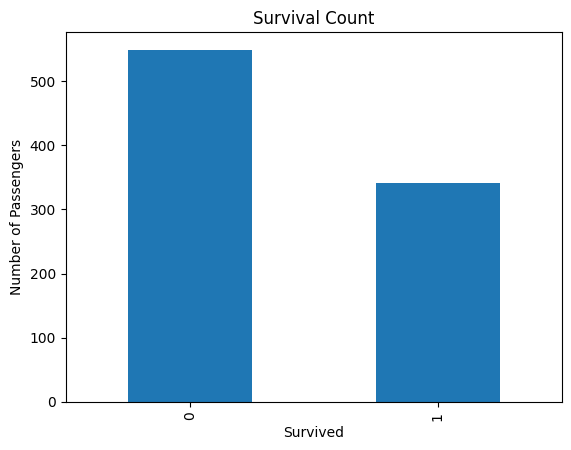

In [41]:
df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

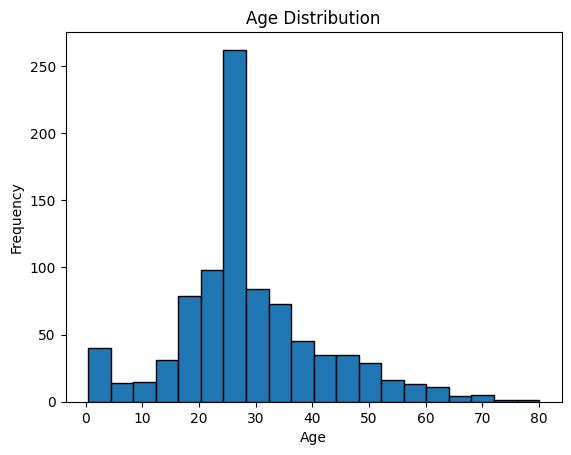

In [44]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

In [49]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    category
 2   pclass       891 non-null    category
 3   name         891 non-null    object  
 4   sex          891 non-null    object  
 5   age          891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("titanic_cleaned.csv")
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


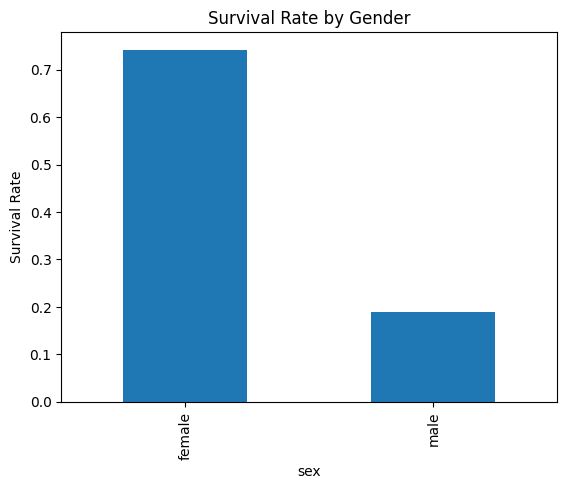

In [54]:
df.groupby("sex")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?

The algorithm used for data cleaning follows a structured approach:

Data Reading & Inspection – Load the dataset and analyze each value.

Handling Missing Values – Apply imputation methods like mean, median, or mode to fill missing data appropriately.

Removing Unnecessary Data – Eliminate redundant or irrelevant attributes that do not contribute to the analysis.

Sorting and Structuring – Organize the dataset based on relevance for better usability.


2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

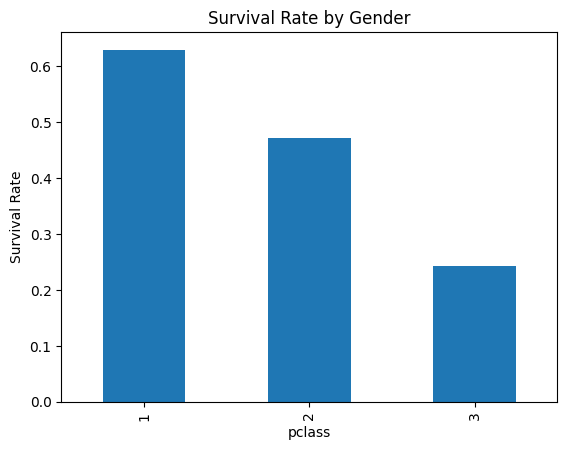

In [56]:
df.groupby("pclass")["survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

In this graph, we can clearly see that most of the survivors consist of higher-class people. Based on that, my conjecture is that most of them survived because of the privilege they have (e.g., being in a cabin where most of the survival aids are available, for example: life jackets, lifebuoys, and such). Other factors could also be their knowledge with regard to certain situations that might have been taught to them in school and their physical health, which is obviously retained and maintained better because they can afford foods that are rich in nutrients.

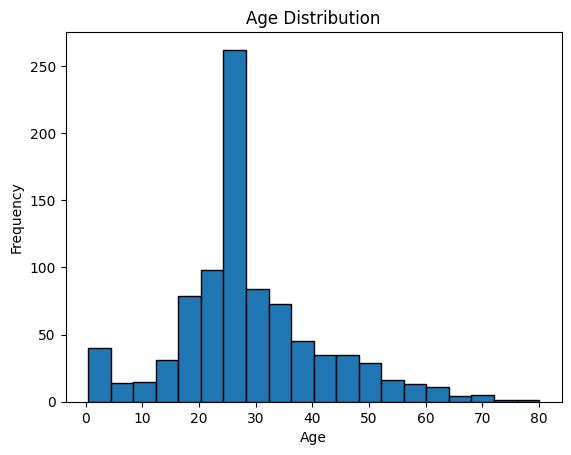

In [57]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

This graph tells us that most of the survivors are within the age of 20-30. Those are the age where men's "prime" starts. Though most of the survivors were women, i think this could also be a factor on as to why that happened. Most probably, those men that did not manage to survive where the ones who prioritized helping other people that needs it.